In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import scipy.stats as stats
import math

In [2]:
# Defining models functions

def conf_matrix(classifier, X_test, y_test):
    _ , ax = plt.subplots(figsize=(8,8)) # Get subplot from matplotlib
    ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
    plt.show()
    

def dec_tree_reg(leaf):
    classifier = DecisionTreeRegressor(min_samples_leaf=leaf)
    classifier.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Evaluation of the Decision Tree model")
    print("Train Score : {}".format(classifier.score(X_train, y_train)))
    print('Test Score : {}'.format(classifier.score(X_test, y_test)))    
    
    
def dec_tree_class(leaf):
    classifier = DecisionTreeClassifier(min_samples_leaf=leaf)
    classifier.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Evaluation of the Decision Tree model")
    print("Train Score : {}".format(classifier.score(X_train, y_train)))
    print('Test Score : {}'.format(classifier.score(X_test, y_test)))
    
    # Confusion matrix
    conf_matrix(classifier, X_test, y_test)
    
    
def random_forest_reg(forest):
    classifier = RandomForestRegressor(n_estimators=forest)
    classifier.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Evaluation of the Random Forest model")
    print("Train Score : {}".format(classifier.score(X_train, y_train)))
    print('Test Score : {}'.format(classifier.score(X_test, y_test)))    

    
def random_forest_class(forest):
    classifier = RandomForestClassifier(n_estimators=forest)
    classifier.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Evaluation of the Random Forest model")
    print("Train Score : {}".format(classifier.score(X_train, y_train)))
    print('Test Score : {}'.format(classifier.score(X_test, y_test)))
    
    # Confusion matrix
    conf_matrix(classifier, X_test, y_test)
    
    
def KNN_reg (n_neighbors):
    classifier = KNeighborsRegressor(n_neighbors = n_neighbors)
    classifier.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Evaluation of the KNN model")
    print("Train Score : {}".format(classifier.score(X_train, y_train)))
    print('Test Score : {}'.format(classifier.score(X_test, y_test)))   

    
def KNN_class (n_neighbors):
    classifier = KNeighborsClassifier(n_neighbors = n_neighbors)
    classifier.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Evaluation of the KNN model")
    print("Train Score : {}".format(classifier.score(X_train, y_train)))
    print('Test Score : {}'.format(classifier.score(X_test, y_test)))   
    
    # Confusion matrix
    conf_matrix(classifier, X_test, y_test)

In [3]:
# Business understanding: what do we have on the data and a menu analysis
coffee_db = pd.read_csv('coffee.csv')
coffee_db.rename(columns = {'0':'sales_outlet_id', '1':'product_id',
                            '2':'customer_id', '3':'transaction_id',
                            '4':'transaction_date',
                            '5':'transaction_time', '6':'staff_id',
                            '7':'instore_yn', '8':'orders',
                            '9': 'line_item_id', '10': 'quantity',
                            '11':'line_item_amount', '12':'unit_price',
                            '13': 'promo_item_yn', '14':'home_store',
                            '15':'customer_first-name',
                            '16':'customer_email', '17':'customer_since',
                            '18':'loyalty_card_number',
                            '19': 'birthdate', '20':'gender',
                            '21':'birth_year', '22':'product_group',
                            '23':'product_category', '24':'product_type',
                            '25':'product', '26':'product_description',
                            '27':'unit_of_measure', '28':'current_wholesame_price',
                            '29':'current_retail_price', '30':'tax_exempt_yn',
                            '31':'promo_yn','32':'new_product_yn','33':'transaction_date',
                            '34':'product_id', '35':'start_of_day', '36':'quantity_sold',
                            '37': 'waste', '38':'%waste'
                           }, inplace = True)
coffee_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280345 entries, 0 to 280344
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_id               280345 non-null  int64  
 1   customer_id              280345 non-null  int64  
 2   transaction_id           280345 non-null  int64  
 3   transaction_date         280345 non-null  object 
 4   transaction_time         280345 non-null  object 
 5   sales_outlet_id          280345 non-null  int64  
 6   staff_id                 280345 non-null  int64  
 7   instore_yn               280345 non-null  object 
 8   orders                   280345 non-null  int64  
 9   line_item_id             280345 non-null  int64  
 10  quantity                 280345 non-null  int64  
 11  line_item_amount         280345 non-null  float64
 12  unit_price               280345 non-null  float64
 13  promo_item_yn            280345 non-null  object 
 14  home

In [4]:
# Creating new features based
coffee_db.loc[(coffee_db.birth_year <= 1969), 'generation'] = 'Senior'
coffee_db.loc[(coffee_db.birth_year > 1969) & (coffee_db.birth_year < 1990 ) , 'generation'] = 'Middle aged'
coffee_db.loc[(coffee_db.birth_year >= 1990 ), 'generation'] = 'Young'

coffee_db.loc[(coffee_db["transaction_time"] >= '06:00:00') & (coffee_db["transaction_time"] <= '12:00:00'), 'period'] = 'Morning'
coffee_db.loc[(coffee_db["transaction_time"] <= '06 :00:00'), 'period'] = 'Night'
coffee_db.loc[(coffee_db["transaction_time"] >= '12 :00:00'), 'period'] = 'Evening'

coffee_db.loc[(coffee_db.line_item_amount <= 4), 'price_evalution'] = 'Cheap'
coffee_db.loc[(coffee_db.line_item_amount > 4) & (coffee_db.line_item_amount <= 10 ) , 'price_evalution'] = 'Average'
coffee_db.loc[(coffee_db.line_item_amount > 8 ), 'price_evalution'] = 'Expensive'

# What if the target variable is the price of the purchase as a continuous distribution?

In [5]:
# Choosing features and dropping duplicates/NaNs
X = coffee_db.loc[:,['transaction_id', 'product_id', 'gender', 
                     'generation', 'promo_item_yn', 'product_category',
                     'line_item_amount', 'period']]

X.drop_duplicates(subset=['transaction_id', 'product_id'], keep='first', inplace=True, ignore_index=False)
X.dropna(inplace=True)

# Train and test split
y = X.loc[:,'line_item_amount']
X = X.loc[:,['promo_item_yn', 'period', 'product_category']]

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Encoding categorical features and standardizing numeric features

numeric_features = [] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [0,1,2] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )
X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [7]:
# Testing the models
dec_tree_reg(30)

random_forest_reg(100)

KNN_reg(3)

Evaluation of the Decision Tree model
Train Score : 0.32087463055804744
Test Score : 0.506709830077614
Evaluation of the Random Forest model
Train Score : 0.3209896432451048
Test Score : 0.5082072343605706
Evaluation of the KNN model
Train Score : 0.20909008434987153
Test Score : 0.20901576417919443


# What if the target variable is a evaliation of how expensive the purchase was?

In [8]:
# Choosing features and dropping duplicates/NaNs
X = coffee_db.loc[:,['transaction_id', 'product_id', 'gender', 
                     'generation', 'promo_item_yn', 'product_category',
                     'line_item_amount', 'period', 'price_evalution']]

X.drop_duplicates(subset=['transaction_id', 'product_id'], keep='first', inplace=True, ignore_index=False)
X.dropna(inplace=True)

# Train and test split
y = X.loc[:,'price_evalution']
X = X.loc[:,['promo_item_yn', 'period', 'product_category']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Encoding categorical features and standardizing numeric features

numeric_features = [] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [0,1,2] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )
X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Evaluation of the Decision Tree model
Train Score : 0.5818819619668902
Test Score : 0.573714004430224


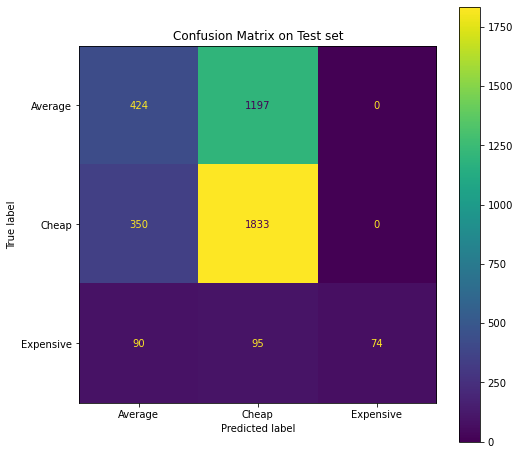

Evaluation of the Random Forest model
Train Score : 0.5818819619668902
Test Score : 0.573714004430224


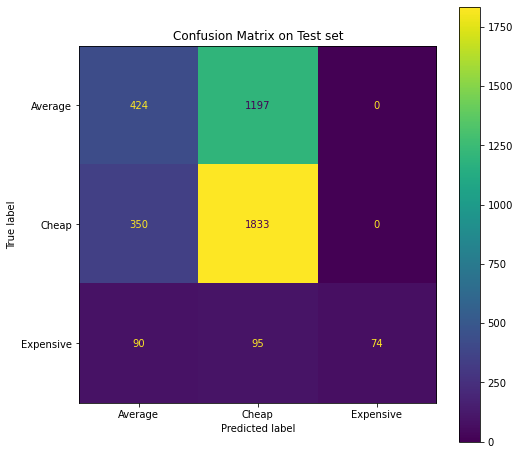

Evaluation of the KNN model
Train Score : 0.5592959566742569
Test Score : 0.5596849618508491


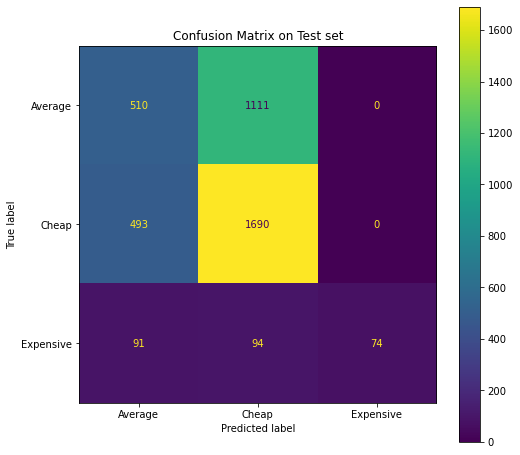

In [10]:
# Testing the models
dec_tree_class(30)

random_forest_class(100)

KNN_class(3)

In [19]:
# Building the confidence interval 

mean = X.line_item_amount.mean()

std = X.line_item_amount.std()

n = len(X.line_item_amount)

 # t-statistics scipy stats
t =  stats.t.ppf(0.975, df = n-1) # 0.975 because Gaussian is symmetric and we need divide 0.05/2

error = t * std/(math.sqrt(n))
confidence_interval = [round(mean - error,2), round(mean + error,2) ]

print("We can say with 95% of confidence that the average price for a sale on the coffe is between ", confidence_interval[0],
      " and ", confidence_interval[1])

We can say with 95% of confidence that the average price for a sale on the coffe is between  4.59  and  4.69
